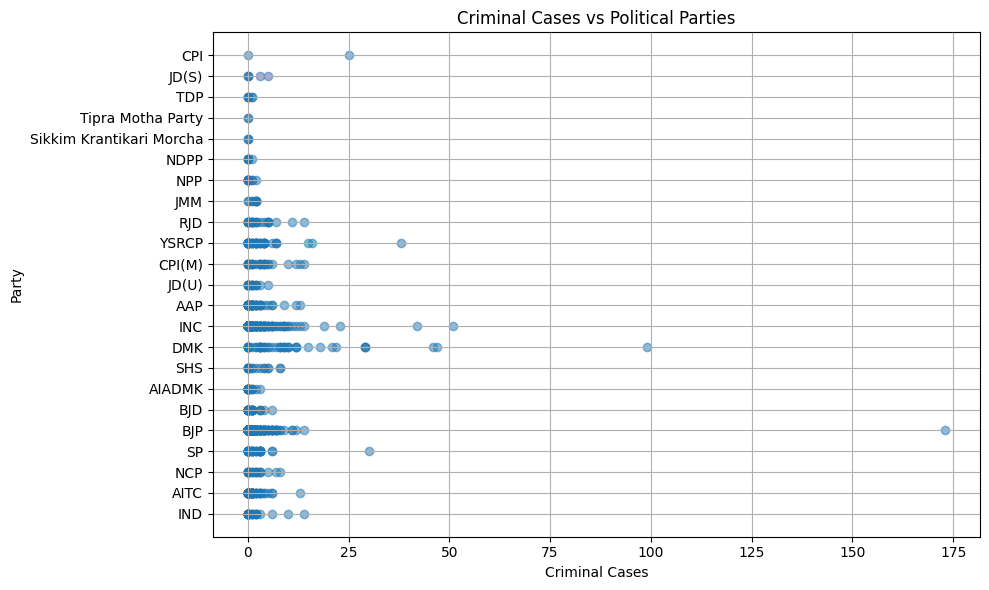

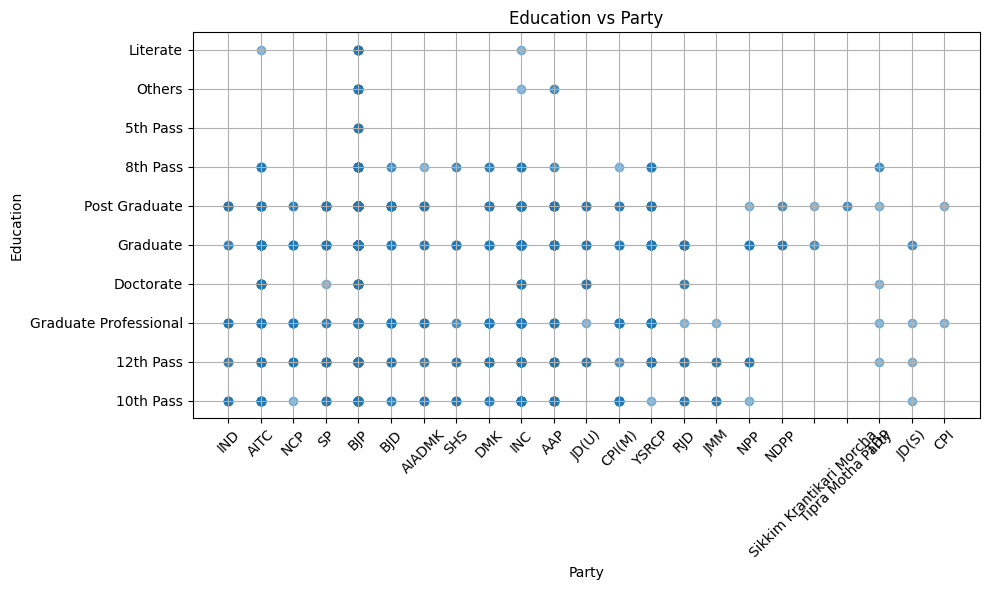

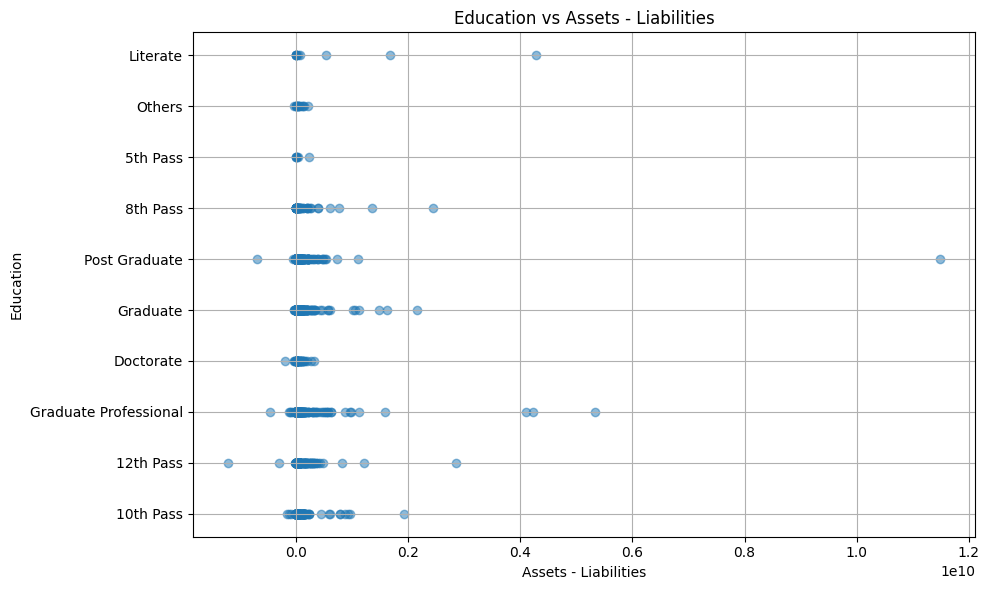

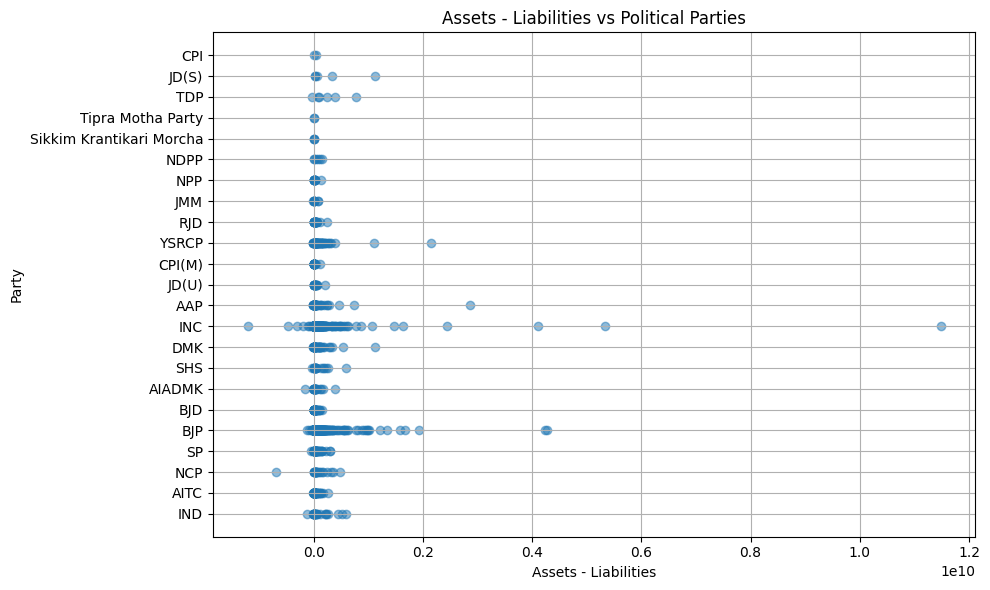

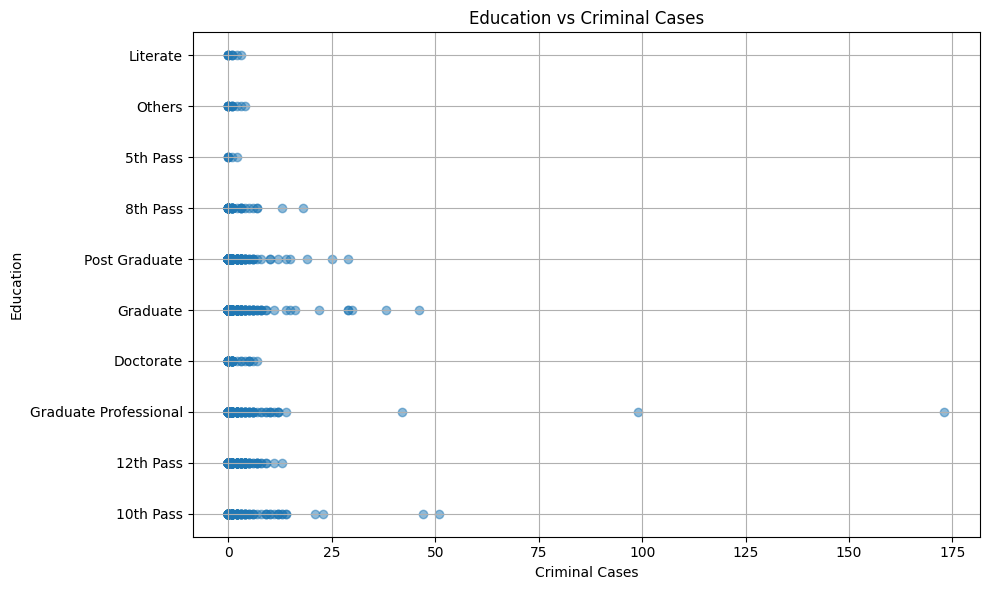

In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Read data
training_data = pd.read_csv('train.csv')
feature_matrix_train = training_data.iloc[0:2059, 3:8]
target_values_train = training_data.iloc[0:2059, 8]
testing_data = pd.read_csv('test.csv')
feature_matrix_test = testing_data.iloc[0:2059, 3:8]

plt.figure(figsize=(10, 6))
plt.scatter(feature_matrix_test['Criminal Case'], feature_matrix_test['Party'], alpha=0.5)
plt.title('Criminal Cases vs Political Parties')
plt.xlabel('Criminal Cases')
plt.ylabel('Party')
plt.grid(True)
plt.tight_layout()
plt.savefig('Criminal_Cases_vs_Political_Parties.png')
plt.show()

# Scatter plot: Assets - Liabilities vs Political Parties


plt.figure(figsize=(10, 6))
plt.scatter(feature_matrix_test['Party'], predictions, alpha=0.5)
plt.title('Education vs Party')
plt.xlabel('Party')
plt.ylabel('Education')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('Education_vs_Party.png')

# Show the plot
plt.show()



def numeric_converter(value):
    if isinstance(value, float):
        return value
    elif value == '0':
        return 0.0
    elif 'Crore' in value:
        return float(value.replace(' Crore+', '')) * 10**7
    elif 'Lac' in value:
        return float(value.replace(' Lac+', '')) * 10**5
    elif 'Thou' in value:
        return float(value.replace(' Thou+', '')) * 10**3




feature_matrix_train['Total Assets'] = feature_matrix_train['Total Assets'].apply(numeric_converter)
feature_matrix_train['Liabilities'] = feature_matrix_train['Liabilities'].apply(numeric_converter)
feature_matrix_train['Liabilities'].fillna(0, inplace=True)

feature_matrix_test['Total Assets'] = feature_matrix_test['Total Assets'].apply(numeric_converter)
feature_matrix_test['Liabilities'] = feature_matrix_test['Liabilities'].apply(numeric_converter)
feature_matrix_test['Liabilities'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(feature_matrix_test['Total Assets'] - feature_matrix_test['Liabilities'], predictions, alpha=0.5)
plt.title('Education vs Assets - Liabilities')
plt.xlabel('Assets - Liabilities')
plt.ylabel('Education')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('Education_vs_Assets_Liabilities.png')

# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(feature_matrix_test['Total Assets'] - feature_matrix_test['Liabilities'], feature_matrix_test['Party'], alpha=0.5)
plt.title('Assets - Liabilities vs Political Parties')
plt.xlabel('Assets - Liabilities')
plt.ylabel('Party')
plt.grid(True)
plt.tight_layout()
plt.savefig('Assets_Liabilities_vs_Political_Parties.png')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(feature_matrix_test['Criminal Case'], predictions, alpha=0.5)
plt.title('Education vs Criminal Cases')
plt.xlabel('Criminal Cases')
plt.ylabel('Education')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('Education_vs_CriminalCases.png')

# Show the plot
plt.show()
label_encoder = LabelEncoder()
feature_matrix_train['Party'] = label_encoder.fit_transform(feature_matrix_train['Party'])
feature_matrix_test['Party'] = label_encoder.transform(feature_matrix_test['Party'])

label_encoder = LabelEncoder()
feature_matrix_train['state'] = label_encoder.fit_transform(feature_matrix_train['state'])
feature_matrix_test['state'] = label_encoder.transform(feature_matrix_test['state'])

robust_scaler = RobustScaler()
feature_matrix_train[['Total Assets', 'Liabilities']] = robust_scaler.fit_transform(feature_matrix_train[['Total Assets', 'Liabilities']])
feature_matrix_test[['Total Assets', 'Liabilities']] = robust_scaler.transform(feature_matrix_test[['Total Assets', 'Liabilities']])

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(feature_matrix_train, target_values_train)
predictions = decision_tree_model.predict(feature_matrix_test)



# Saving predictions to CSV file
prediction_df = pd.DataFrame({'ID': testing_data['ID'], 'Education': predictions}, columns=['ID', 'Education'])
prediction_df.to_csv('C:/Users/Admin/CS253 Assignment/SampleSub3.csv', index=False)
